In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt
import nltk,re,seaborn as sns
from nltk.corpus import stopwords

In [2]:
train=pd.read_csv('/home/aravind/Downloads/ML/chats.csv')

In [3]:
train.drop(['Unnamed: 7','timestamp'],
           axis=1,
           inplace=True)

In [4]:
#Splitting time and date from the column datetime
train['Time'],train['Date']= train['datetime'].apply(lambda x:x.split(' ')[1]),train['datetime'].apply(lambda x:x.split(' ')[0])

In [5]:
#extracting hour from time
train['Time']=train['Time'].apply(lambda x:x.split(':')[0])

In [6]:
train['datetime']=train['datetime'].astype('datetime64[ns]')

In [7]:
train = pd.concat([train,pd.get_dummies(train['type'])],axis=1)

In [8]:
#applying lambda function to get month and year from date respectively
train['month']= train['Date'].apply(lambda x:int(str(x).split('.')[1]))
train['year']= train['Date'].apply(lambda x:int(str(x).split('.')[2]))

In [9]:
train.head(5)

datetime          member  type  \
0 2018-04-12 17:52:00  Abhishek Yadav  text   
1 2018-04-12 17:59:00  Abhishek Yadav  text   
2 2018-04-12 18:00:00         Navjeet  text   
3 2018-04-12 22:47:00          Rishav  text   
4 2018-04-12 22:47:00          Rishav  text   

                               content wordcount  lettercount Time  \
0  Does anyone have ayush shukla's no.         6           30   17   
1                         Thanks bro..         2           11   17   
2                                   😁😁         1            2   18   
3               18th ko konsa exam hai         5           18   22   
4                              Subject         1            7   22   

         Date  media  text  month  year  
0  04.12.2018      0     1     12  2018  
1  04.12.2018      0     1     12  2018  
2  04.12.2018      0     1     12  2018  
3  04.12.2018      0     1     12  2018  
4  04.12.2018      0     1     12  2018

Text(0.5, 1.0, 'Total Messages over the months')

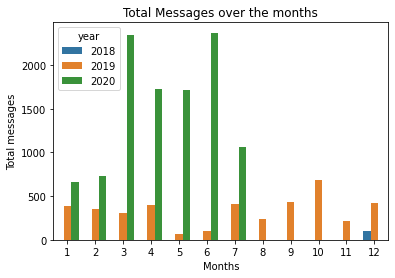

In [10]:
#plotting total number of messages over the month
df1 = pd.DataFrame(train.groupby(['month','year'],as_index=False)['text'].sum())
sns.barplot(x ='month', y ='text', data = df1, hue ='year')
plt.xlabel("Months")
plt.ylabel("Total messages")
plt.title("Total Messages over the months")

Text(0.5, 1.0, 'Total Messages over 24 hours')

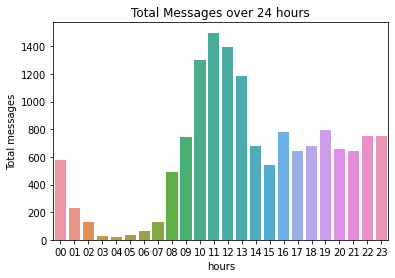

In [11]:
df2 = pd.DataFrame(train.groupby('Time',as_index=False)['text'].sum())
sns.barplot(x ='Time', y ='text', data = df2)
plt.xlabel("hours")
plt.ylabel("Total messages")
plt.title("Total Messages over 24 hours")

Text(0.5, 1.0, 'Top 6 active members on group ranked from meghaj to rohan')

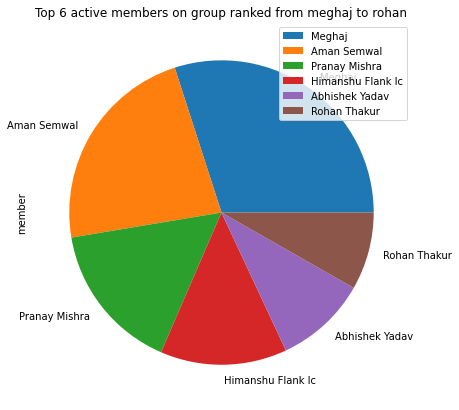

In [12]:
df3 = pd.DataFrame(train['member'].value_counts().head(6))
df3.plot.pie(y='member',figsize=(7,7))
plt.title("Top 6 active members on group ranked from meghaj to rohan")

Text(0.5, 1.0, 'Top 6 active members on group who share most of media files ranked from rohan to abhishek')

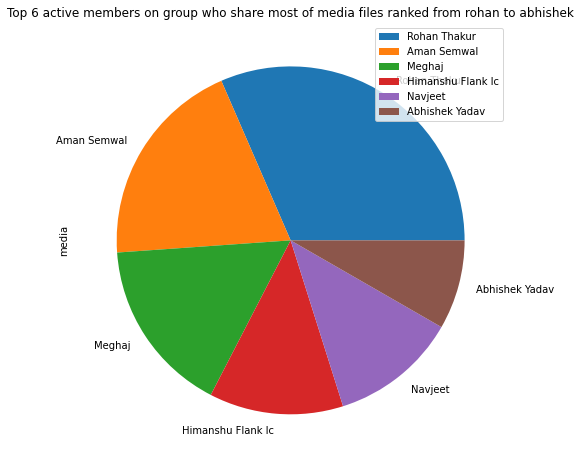

In [13]:
df4 = pd.DataFrame(train.groupby('member')['media'].sum())
df4 =(df4.sort_values('media',ascending=False)).head(6)
df4.plot.pie(y='media',figsize=(8,8))
plt.title("Top 6 active members on group who share most of media files ranked from rohan to abhishek")

In [14]:
# combining all words  used in dataset
text = " ".join(str(review) for review in train.content)

In [15]:
def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    text = re.sub(r'#([^\s]+)', '', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def replaceMultispace(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\ )\1+", '', text)
    return text

In [16]:
text = text.lower()
text = replaceURL(text)
text = replaceMultispace(text)
text = removeNumbers(text)

In [17]:
from wordcloud import WordCloud,STOPWORDS 
stopwords = set(STOPWORDS)
stopwords.update(["This", "message", "was", "deleted", "nan","ki", "se", "thi", "bhi", "nan",
                "aur", "ka", "ke", "koi", "toh","kya", "hain", "ko", "deleted", "nan"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=100).generate(text)

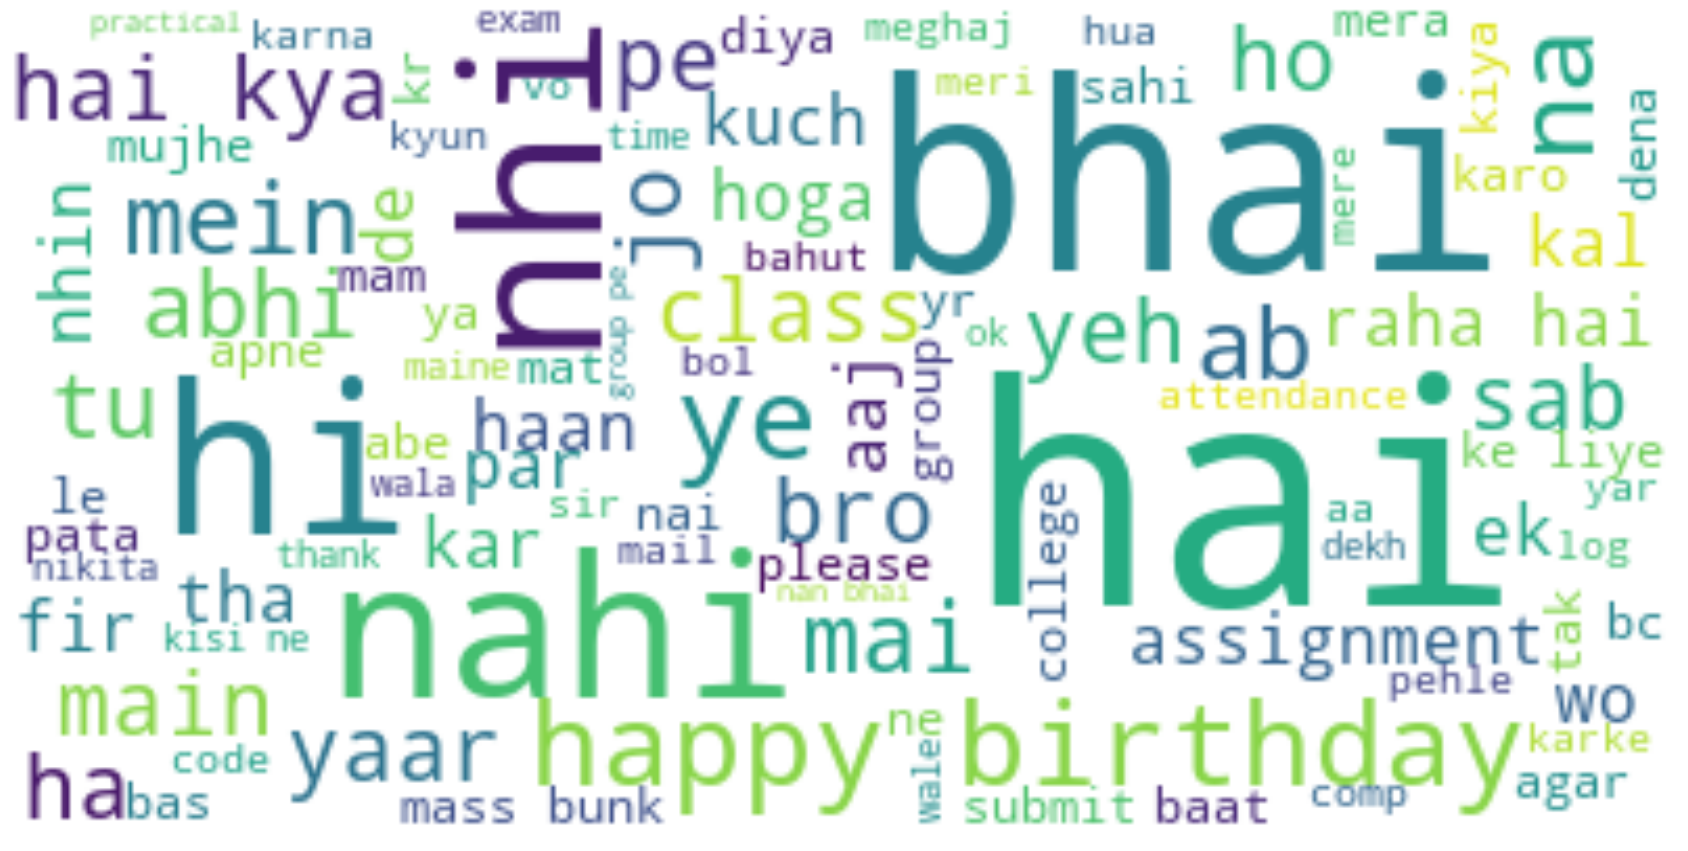

In [18]:
plt.figure( figsize=(30,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 10 days with most number of messages')

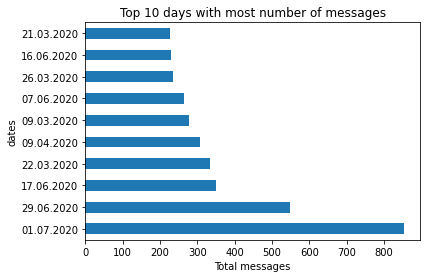

In [19]:
train['Date'].value_counts().head(10).plot.barh()
plt.ylabel("dates")
plt.xlabel("Total messages")
plt.title("Top 10 days with most number of messages")

In [20]:
def dayofweek(i):
    l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return l[i];
day_df=pd.DataFrame(train["content"])
day_df['day_of_date'] = train['datetime'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [21]:
import plotly.express as px

In [22]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,3500]
    )),
  showlegend=True
)
fig.show()